In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
#style.use("ggplot")
from sklearn import svm
import cv2
import os
import av
import shutil

from sklearn import datasets

In [22]:
%matplotlib inline

In [143]:
WORKING_FOLDER = "/home/eola/research"
DB_FOLDER = "{}/AFEW 5.0". format(WORKING_FOLDER)
FRAMES_FOLDER = "{}/Frames". format(WORKING_FOLDER)
DB_TRAIN = "{}/Train". format(DB_FOLDER)

In [144]:
def get_videos_dict():
    videos = {} #emotion_name: [] of videos names
    for root, dirs, files in os.walk(DB_TRAIN):
        # for all emotion folders
        for dirname in dirs:
            # put videos names in current emotion folder
            videos[dirname] = []
            for r, d, f in os.walk("{}/{}".format(DB_TRAIN, dirname)):
                videos[dirname].extend(f)
                break    
        # process root only
        break

#     for emotion, videos_list in videos.iteritems():
#         print "{}: {}".format(emotion, len(videos_list))
        
    return videos

In [145]:
def delete_frames():
    if os.path.exists(FRAMES_FOLDER):
        shutil.rmtree(FRAMES_FOLDER)

In [155]:
def extract_frames():
    print "extract_frames"
    
    if os.path.exists(FRAMES_FOLDER):
        print "Frames have already been extracted to {}".format(FRAMES_FOLDER)
        return
       
    videos = get_videos_dict()
    os.mkdir(FRAMES_FOLDER)
    for emotion_name, videos_list in videos.iteritems():
        print "{}: {}".format(emotion_name, len(videos_list))
        current_db_folder = "{}/{}".format(DB_TRAIN, emotion_name)
        current_frames_folder = "{}/{}".format(FRAMES_FOLDER, emotion_name)
        os.mkdir(current_frames_folder)
        video_count = 0
        for video in videos_list:
            video_frames_path = "{}/{}".format(current_frames_folder, video)
            os.mkdir(video_frames_path)
            container = av.open("{}/{}".format(current_db_folder, video))
            
            # extract frames amd save them as jpg files
            count = 0
            frames = []
            for packet in container.demux():
                for frame in packet.decode():
                    if(type(frame) == av.VideoFrame):
                        frame_path = "{}/{}.jpg".format(video_frames_path, count)
                        frame.to_image().save(frame_path)
#                         img = mpimg.imread(frame_path)
#                         plt.imshow(img)
#                         plt.show
                        count += 1
    
            video_count += 1
            if not video_count % 10:
                print video_count,
        print

In [156]:
# delete_frames()
extract_frames()

extract_frames
Angry: 118
10 20 30 40 50 60 70 80 90 100 110
Sad: 107
10 20 30 40 50 60 70 80 90 100
Neutral: 131
10 20 30 40 50 60 70 80 90 100 110 120 130
Disgust: 72
10 20 30 40 50 60 70
Surprise: 73
10 20 30 40 50 60 70
Fear: 77
10 20 30 40 50 60 70
Happy: 145
10 20 30 40 50 60 70 80 90 100 110 120 130 140


In [157]:
sift = cv2.SIFT()
descriptors = []
for path in training_paths:
    image = cv2.imread(path)
    print path
    gray = cv2.cvtColor(image, cv2.CV_LOAD_IMAGE_GRAYSCALE)
    kp, dsc= sift.detectAndCompute(gray, None)
    descriptors.append(dsc)

des = np.array(descriptors)

k=5
bow = cv2.BOWKMeansTrainer(k)
bow.cluster(des)

OK
2.0
res: True
1244160
res: True
1244160
res: True
1244160
done


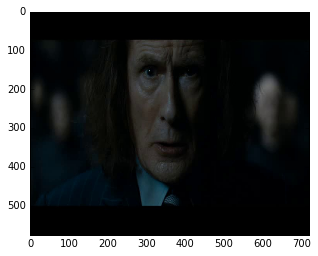

In [57]:
# cap = cv2.VideoCapture("test.avi")
# if cap.isOpened():
#     print "OK"
# else:
#     print "Trouble"
    
# fps = cap.get(cv2.cv.CV_CAP_PROP_FPS)
# f_num = cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)
# print f_num

# rval, frame = cap.read()
# while rval:
#     print "res: " + str(rval)

#     print frame.size
#     cv2.imwrite("test.jpg", frame)

#     import matplotlib.image as mpimg
#     img=mpimg.imread("test.jpg")
#     plt.imshow(img)
#     # plt.axis('off')
#     plt.show
    
#     rval, frame = cap.read()

# print "done"

In [21]:
home_str = "~/research/"

In [22]:
from sklearn import datasets
iris = datasets.load_iris()


In [23]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris.data, iris.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)